In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter, MaxNLocator, ScalarFormatter
import joblib
import seaborn as sns

plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import netCDF4 as nc
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
import geopandas as gpd
from shapely.geometry import Point, MultiPoint

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\geopandas\_compat.py:154: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  set_use_pygeos()
C:\Users\aa271\AppData\Local\Temp\ipykernel_3672\3214059155.py:10: DeprecationWarning: GeoPandas is set to use PyGEOS over Shapely. PyGEOS support is deprecatedand will be removed in GeoPandas 1.0, released in the Q1 of 2024. Please migrate to Shapely 2.0 (https://geopandas.org/en/stable/docs/user_guide/pygeos_to_shapely.html).
  import geopandas as gpd


In [3]:
dataset = nc.Dataset('new_data.nc', 'r')
dataseto = nc.Dataset('averaged_data.nc', 'r')
datasete = nc.Dataset('effect_data.nc', 'r')
dataml = nc.Dataset('levtype_ml.nc', 'r')
datapl = nc.Dataset('levtype_pl.nc', 'r')
datasfc = nc.Dataset('levtype_sfc.nc', 'r')
datapre = nc.Dataset('pred_data.nc', 'r')
mask = nc.Dataset("landseamask.nc", 'r')


In [4]:
realnamesunit = ['PM$_1$ ($μg/m^3$)', 'Isoprene\n($μg/m^3$)', '1,3-Butadiene\n($μg/m^3$)', 'Butene\n($μg/m^3$)',
                 'Pentene\n($μg/m^3$)', 'NO$_x$ (ppb)', 'O$_3$ (ppb)', 'SO$_2$ (ppb)', 'Radiation\n(W/m$^2$)',
                 'Temperature\n(℃)', 'Humidity (%)']
realnames = ['PM$_1$', 'Isoprene', '1,3-Butadiene', 'Butene', 'Pentene', 'NO$_x$', 'O$_3$', 'SO$_2$',
             'Radiation', 'Temperature', 'Humidity']
name = ['so2', 'no2', 'no', 'go3', 'c5h8', 'pm1', 'pm2p5', 'ssr', 'r', 't', 'nox']
namerealen = ['so2', 'no2', 'no', 'go3', 'c5h8', 'pm1', 'pm2p5', 'ssr', 'r', 't', 'nox']
namerealcn = ['SO$_2$', 'NO$_x$', 'no', 'go3', 'c5h8', 'pm1', 'pm2p5', 'ssr', 'r', 't', 'nox']

In [5]:
X2 = datapre.variables["pm1_pred"][:]
X1 = dataseto.variables["pm1"][:]
X3 = np.mean(datasfc.variables["lai_hv"][:], axis=0)

vtoplotname = "pm1"
vtoplot = dataseto.variables[vtoplotname][:]

# 获取经纬度和掩码
longitude = dataseto.variables['longitude'][:]
latitude = dataseto.variables['latitude'][:]
land_sea_mask = mask.variables['lsm'][0]  # 读取陆地/海洋掩码
# 创建掩码
c5h8_mask = (dataseto.variables['c5h8'][:] == 0)
latitude_2d = np.tile(latitude[:, np.newaxis], (1, vtoplot.shape[1]))
antarctic_mask = latitude_2d < -60
zero = vtoplot < 0

# pm1_mask = (dataseto.variables['pm1'][:] < 13)*(dataseto.variables['pm1'][:] > 90)*(datapre.variables["pm1_pred"][:] > 90)*(datapre.variables["pm1_pred"][:] < 13)
pm1_mask = (dataseto.variables['pm1'][:] <= 10)
pm1_mask2 = (dataseto.variables['pm1'][:] >= 120)
lai_mask = (np.mean(datasfc.variables["lai_hv"][:], axis=0) == 0)

combined_mask = (land_sea_mask == 0) | antarctic_mask | c5h8_mask | zero | pm1_mask | lai_mask
# combined_mask = (land_sea_mask == 0) | antarctic_mask | c5h8_mask | zero | lai_mask

X1 = np.ma.array(X1, mask=combined_mask).compressed()
X2 = np.ma.array(X2, mask=combined_mask).compressed()
X3 = np.ma.array(X3, mask=combined_mask).compressed()

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Figure size 1008x720 with 0 Axes>

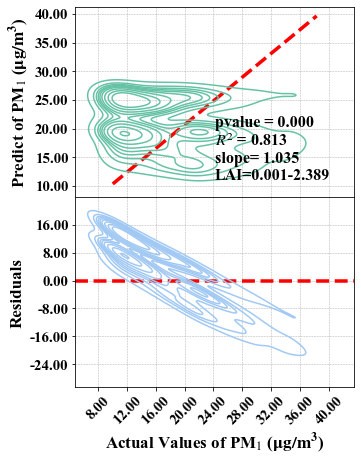

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

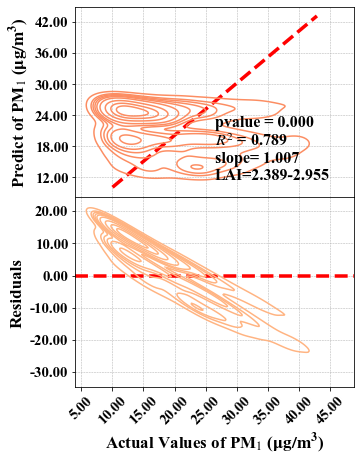

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

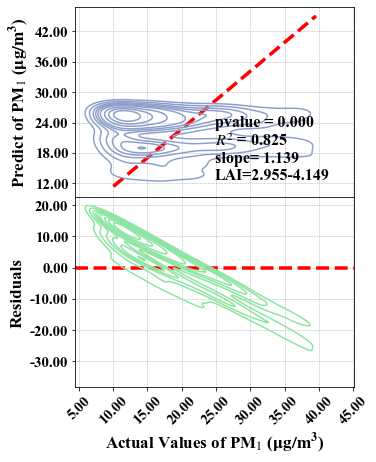

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

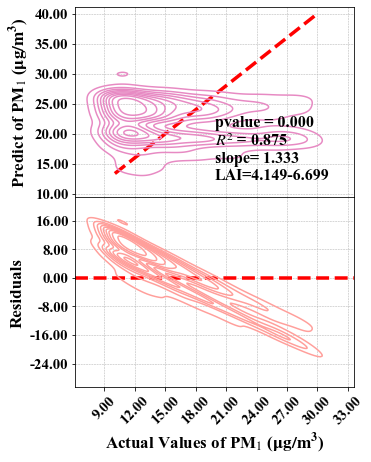

In [6]:
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# 根据X3的四个分位数进行分组
quantiles = np.percentile(X3, [25, 50, 75])
groups = np.digitize(X3, quantiles)

# 准备绘图
plt.figure(figsize=(14, 10))
colorc=sns.color_palette("Set2")
colord=sns.color_palette("pastel")
labels = ['Q1', 'Q2', 'Q3', 'Q4']

for i in range(4):
    # 获取当前分组的数据
    maski = groups == i
    X1_group = X1[maski]
    X2_group = X2[maski]

    # 去除0到0.01的值
    mask_nonzero = (X1_group > 0.1) & (X2_group > 5)
    X1_group = X1_group[mask_nonzero]
    X2_group = X2_group[mask_nonzero]

    # 处理极端值
    q25, q75 = np.percentile(X1_group, [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    mask_extreme = (X1_group >= lower_bound) & (X1_group <= upper_bound)
    X1_group = X1_group[mask_extreme]
    X2_group = X2_group[mask_extreme]

    t_pred=X2_group
    t_test=X1_group

    # 回归分析
    model = sm.OLS(t_pred, t_test).fit(cov_type='HC3')

    # 获取回归参数和统计量
    slope = model.params[0]
    r_squared = model.rsquared
    p_value = model.pvalues[0]

     # 计算MSE和R2
    # mse_t = mean_squared_error(t_test, t_pred)
    r2_t =  r_squared


    fig, axs = plt.subplots(2, 1, figsize=(5, 7), sharex=True)
    fig.set_facecolor('white')

    # 真实值 vs 预测值

    # 计算基于斜率的预测值
    predicted_min = slope * min(t_test)
    predicted_max = slope * max(t_test)
    # 绘制基于斜率的回归线
    axs[0].plot([min(t_test), max(t_test)], [predicted_min, predicted_max], 'r--', lw=3.5)

    # axs[0].scatter(t_test, t_pred, alpha=0.005, edgecolors='w', linewidth=0.5, color=colorc[i])
    sns.kdeplot(x=t_test,y=t_pred, color=colorc[i],ax=axs[0])

    axs[0].set_ylabel(r'Predict of PM$_1$ ($\mathbf{μg/m^3}$)', fontsize=17,
                 fontweight='bold')
    axs[0].text(0.5, 0.43,
                f'pvalue = {p_value:.3f}\n$R^2$ = {r2_t:.3f}\nslope= {slope:.3f}\nLAI={np.percentile(X3, [0,25, 50, 75,100])[i]:.3f}-{np.percentile(X3, [0,25, 50, 75,100])[i+1]:.3f}', transform=axs[0].transAxes, va='top', fontsize=16,
                 fontweight='bold')

    # 残差图
    residuals_t = t_pred - model.predict(t_test)
    # axs[1].scatter(t_test, residuals_t, alpha=0.05, edgecolors='w', linewidth=0.5, color=colord[i], s=8)
    axs[1].axhline(0, color='r', linestyle='--', lw=3.5)
    axs[1].set_xlabel(r'Actual Values of PM$_1$ ($\mathbf{μg/m^3}$)', fontsize=17,
                 fontweight='bold')
    axs[1].set_ylabel('Residuals', fontsize=17,
                 fontweight='bold')
    sns.kdeplot(x=t_test,y=residuals_t, color=colord[i],ax=axs[1])

    for ax in [axs[0], axs[1]]:
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
        ax.tick_params(axis='both', labelsize=13)

        def format_ticks(x, pos):
            return f'{x:.2f}'  # 保留两位小数

        # 设置x轴刻度的格式
        ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=7))
        ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
            
    for axe in axs:
        for label in axe.get_xticklabels() + axe.get_yticklabels():
            label.set_fontweight('bold')
            label.set_fontsize(15)
    for axe in axs:
        for label in axe.get_xticklabels() :
            label.set_rotation(45)

    plt.subplots_adjust(hspace=0)  # 减少子图间距
    plt.savefig(fr"F:\作业文件\BVOC-SOA\CI\毕设图片重绘\第五章\residual_{i}审稿图.jpg", bbox_inches='tight',dpi=300)
    plt.show()

In [7]:
X2 = datapre.variables["iso_pred"][:]
X1 = dataseto.variables["c5h8"][:]
X3 = np.mean(datasfc.variables["lai_hv"][:], axis=0)

vtoplotname = "pm1"
vtoplot = dataseto.variables[vtoplotname][:]

# 获取经纬度和掩码
longitude = dataseto.variables['longitude'][:]
latitude = dataseto.variables['latitude'][:]
land_sea_mask = mask.variables['lsm'][0]  # 读取陆地/海洋掩码
# 创建掩码
c5h8_mask = (dataseto.variables['c5h8'][:] == 0)
latitude_2d = np.tile(latitude[:, np.newaxis], (1, vtoplot.shape[1]))
antarctic_mask = latitude_2d < -60
zero = vtoplot < 0

# pm1_mask = (dataseto.variables['pm1'][:] < 13)*(dataseto.variables['pm1'][:] > 90)*(datapre.variables["pm1_pred"][:] > 90)*(datapre.variables["pm1_pred"][:] < 13)
pm1_mask = (dataseto.variables['pm1'][:] <= 10)
pm1_mask2 = (dataseto.variables['pm1'][:] >= 120)
lai_mask = (np.mean(datasfc.variables["lai_hv"][:], axis=0) == 0)

# combined_mask = (land_sea_mask == 0) | antarctic_mask | c5h8_mask | zero | pm1_mask | lai_mask
combined_mask = (land_sea_mask == 0) | antarctic_mask | c5h8_mask | zero | lai_mask


X1 = np.ma.array(X1, mask=combined_mask).compressed()
X2 = np.ma.array(X2, mask=combined_mask).compressed()
X3 = np.ma.array(X3, mask=combined_mask).compressed()

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Figure size 1008x720 with 0 Axes>

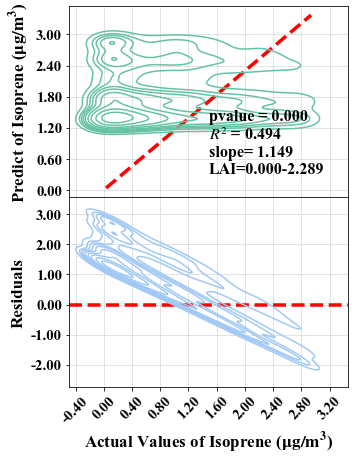

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

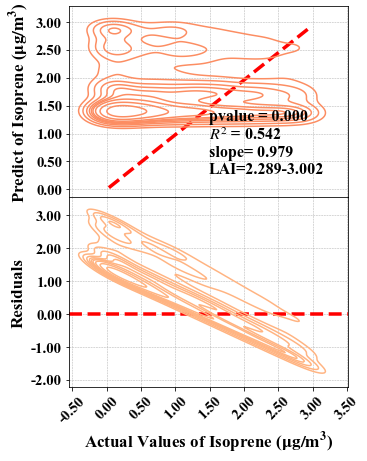

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

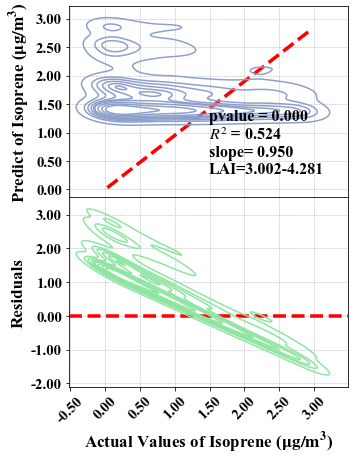

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

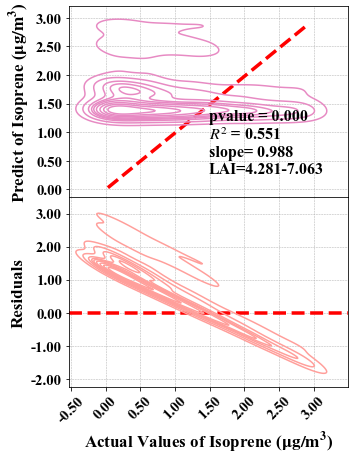

In [8]:
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# 根据X3的四个分位数进行分组
quantiles = np.percentile(X3, [25, 50, 75])
groups = np.digitize(X3, quantiles)

# 准备绘图
plt.figure(figsize=(14, 10))
colorc=sns.color_palette("Set2")
colord=sns.color_palette("pastel")
labels = ['Q1', 'Q2', 'Q3', 'Q4']

for i in range(4):
    # 获取当前分组的数据
    maski = groups == i
    X1_group = X1[maski]
    X2_group = X2[maski]

    # 去除0到0.01的值

    s=1.304+1.653
    mask_nonzero = (X1_group <s) & (X2_group <s)
    X1_group = X1_group[mask_nonzero]
    X2_group = X2_group[mask_nonzero]

    # 处理极端值
    q25, q75 = np.percentile(X1_group, [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    mask_extreme = (X1_group >= lower_bound) & (X1_group <= upper_bound)
    X1_group = X1_group[mask_extreme]
    X2_group = X2_group[mask_extreme]

    t_pred=X2_group
    t_test=X1_group

    # 回归分析
    model = sm.OLS(t_pred, t_test).fit(cov_type='HC3')

    # 获取回归参数和统计量
    slope = model.params[0]
    r_squared = model.rsquared
    p_value = model.pvalues[0]

     # 计算MSE和R2
    # mse_t = mean_squared_error(t_test, t_pred)
    r2_t =  r_squared


    fig, axs = plt.subplots(2, 1, figsize=(5, 7), sharex=True)
    fig.set_facecolor('white')

    # 真实值 vs 预测值

    # 计算基于斜率的预测值
    predicted_min = slope * min(t_test)
    predicted_max = slope * max(t_test)
    # 绘制基于斜率的回归线
    axs[0].plot([min(t_test), max(t_test)], [predicted_min, predicted_max], 'r--', lw=3.5)

    # axs[0].scatter(t_test, t_pred, alpha=0.5, edgecolors='w', linewidth=0.5, color=colorc[i])
    sns.kdeplot(x=t_test,y=t_pred, color=colorc[i],ax=axs[0])

    axs[0].set_ylabel(r'Predict of Isoprene ($\mathbf{μg/m^3}$)', fontsize=17,fontweight='bold')
    axs[0].text(0.5, 0.46,
                f'pvalue = {p_value:.3f}\n$R^2$ = {r2_t:.3f}\nslope= {slope:.3f}\nLAI={np.percentile(X3, [0,25, 50, 75,100])[i]:.3f}-{np.percentile(X3, [0,25, 50, 75,100])[i+1]:.3f}', transform=axs[0].transAxes, va='top', fontsize=16,fontweight='bold')

    # 残差图
    residuals_t = t_pred - model.predict(t_test)
    # axs[1].scatter(t_test, residuals_t, alpha=0.5, edgecolors='w', linewidth=0.5, color=colord[i], s=8)
    axs[1].axhline(0, color='r', linestyle='--', lw=3.5)
    axs[1].set_xlabel(r'Actual Values of Isoprene ($\mathbf{μg/m^3}$)', fontsize=17,fontweight='bold')
    axs[1].set_ylabel('Residuals', fontsize=17,fontweight='bold')
    sns.kdeplot(x=t_test,y=residuals_t, color=colord[i],ax=axs[1])

    for ax in [axs[0], axs[1]]:
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
        ax.tick_params(axis='both', labelsize=13)

        def format_ticks(x, pos):
            return f'{x:.2f}'  # 保留两位小数

        # 设置x轴刻度的格式
        ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=7))
        ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
        
    for axe in axs:
        for label in axe.get_xticklabels() + axe.get_yticklabels():
            label.set_fontweight('bold')
            label.set_fontsize(15)
    for axe in axs:
        for label in axe.get_xticklabels() :
            label.set_rotation(45)

    plt.subplots_adjust(hspace=0)  # 减少子图间距
    plt.savefig(fr"F:\作业文件\BVOC-SOA\CI\毕设图片重绘\第五章\residualiso_{i}审稿图.jpg", bbox_inches='tight',dpi=300)
    plt.show()

In [9]:
vtoplotname = "pm1_effects"
vtoplot = datasete.variables[vtoplotname][:]

longitude = datasete.variables['longitude'][:]
latitude = datasete.variables['latitude'][:]
land_sea_mask = mask.variables['lsm'][0]  # 读取陆地/海洋掩码


# 去掉小于0
zero = (datasete.variables[vtoplotname][:] < 0)

# c5h8_mask已定义为 (451, 900)，且c5h8为0的地方为True
c5h8_mask = (dataseto.variables['c5h8'][:] == 0)

# 创建南极掩码 (假设南极为纬度小于-60度)
latitude_2d = np.tile(latitude[:, np.newaxis], (1, 900))  # 确保与数据维度匹配
antarctic_mask = latitude_2d < -60

# 合并掩码：去掉海洋（mask == 0）和南极洲，以及c5h8为0的区域
combined_mask = (land_sea_mask == 0) | antarctic_mask | c5h8_mask |zero

# 应用掩码
vtoplot = np.ma.array(vtoplot, mask=combined_mask)# c5h8_mask已定义为 (451, 900)，且c5h8为0的地方为True

# 创建南极掩码 (假设南极为纬度小于-60度)
latitude_2d = np.tile(latitude[:, np.newaxis], (1, 900))  # 确保与数据维度匹配
antarctic_mask = latitude_2d < -60

# 合并掩码：去掉海洋（mask == 0）和南极洲，以及c5h8为0的区域
combined_mask = (land_sea_mask == 0) | antarctic_mask | c5h8_mask |zero

# 应用掩码
vtoplot = np.ma.array(vtoplot, mask=combined_mask)

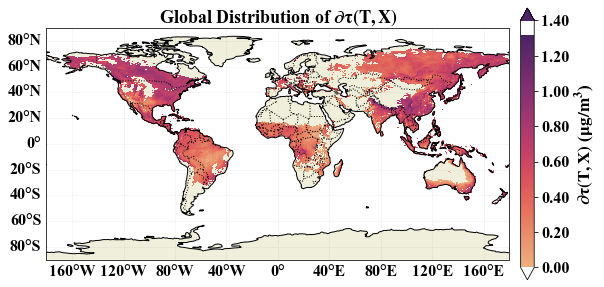

In [10]:


# 绘制地图及数据
fig = plt.figure(figsize=(10, 5))
fig.set_facecolor('white')
ax = plt.axes(projection=ccrs.PlateCarree())  # 使用Plate Carree投影
ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()], crs=ccrs.PlateCarree())

# 添加地图特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=1, facecolor='white')

# 自定义颜色图
cmap = sns.color_palette("flare", as_cmap=True)
cmap.set_under('none', alpha=0)


# 获取用于规范化的百分位数值
vmin = np.percentile(vtoplot.data.flatten(), 10)  # 取大于0的数据的10th百分位数
vmax = np.percentile(vtoplot.data.flatten(), 80)  # 取大于0的数据的99th百分位数
# 使用对数规范化来强调颜色映射的效果
norm = LogNorm(vmin=vmin, vmax=vmax)
# 绘制数据
vtoplot_mesh = ax.pcolormesh(longitude, latitude, vtoplot, cmap=cmap,transform=ccrs.PlateCarree())

# # 绘制数据
# vtoplot_mesh = ax.pcolormesh(longitude, latitude, vtoplot, cmap=cmap, norm=LogNorm(vmin=vtoplot[vtoplot > 0].min(), vmax=vtoplot.max()),  transform=ccrs.PlateCarree())

# 色标设置
cbar = plt.colorbar(vtoplot_mesh, orientation='vertical', pad=0.02, extend='both')
cbar.set_label('$\mathbf{\partial τ(T, X)}$ ($\mathbf{μg/m^3}$)', fontsize=17, fontweight='bold')
cbar.ax.tick_params(labelsize=12)  # 修改色标刻度标签的大小
# 设置刻度标签的字体属性
font_path = 'F:\作业文件\BVOC-SOA\CI\毕设图片重绘\TimesSong.ttf'  # 字体文件路径
# 获取当前的刻度位置并重新设置它们
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)  # 显式设置刻度位置
labels = [f'{tick:.2f}' for tick in ticks]  # 使用科学记数法格式化刻度标签，保留一位小数
cbar.ax.set_yticklabels(labels, size=12)


# 设置网格线和标签
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.2, linestyle='--')
gl.xlocator = MaxNLocator(nbins=9)
gl.ylocator = MaxNLocator(nbins=9)
gl.xlabel_style = {'size': 16, 'color': 'black','fontweight':'bold'}
gl.ylabel_style = {'size': 16, 'color': 'black','fontweight':'bold'}
gl.top_labels = False
gl.right_labels = False

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(16)
    
for tick in cbar.ax.yaxis.get_ticklabels():
    tick.set_fontweight('bold')
    tick .set_fontsize(16)


# 设置标题
plt.title('Global Distribution of $\mathbf{\partial τ(T, X)}$', fontsize=18, fontweight='bold')
plt.savefig("SOA生成效应数据集分布审稿.jpg", dpi=600)
plt.show()

In [11]:
# 读取插值结果的 Excel 文件
file_path = "c5h8_interpolated_results.xlsx"  # 请确保路径正确
df_result = pd.read_excel(file_path)

# 提取时间和 Jinhai（JH）、Chongming（CM）的数据
df_result['Date'] = pd.to_datetime(df_result['Date'])  # 转换时间为 datetime 格式
dates = df_result['Date']
jinhai = df_result['JH C5H8 (ug/m3)']
chongming = df_result['CM C5H8 (ug/m3)']

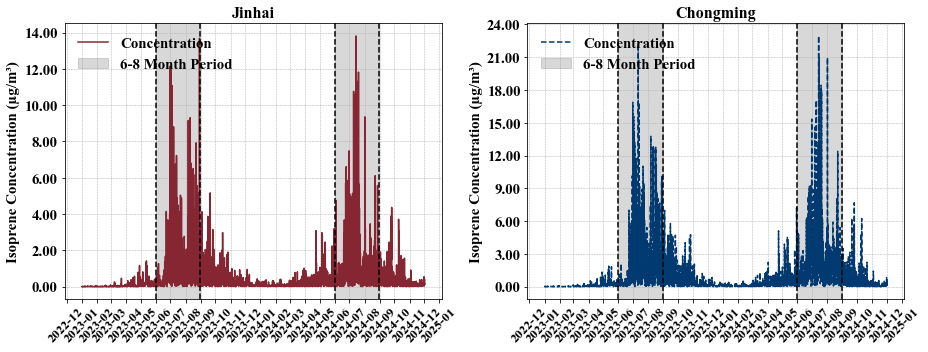

In [12]:
import matplotlib.dates as mdates
dates = pd.to_datetime(dates)  # 确保 dates 是 datetime 类型

# 创建图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))  # 1行2列的子图
fig.set_facecolor('white')

# 绘制 Jinhai 的时间序列
ax1.plot(dates, jinhai, label='Jinhai Concentration', linestyle='-', linewidth=1.5, color='#862633')
ax1.set_title("Jinhai", fontsize=16, fontweight='bold')
ax1.set_xlabel("", fontsize=12, fontweight='bold')
ax1.set_ylabel("Isoprene Concentration (µg/m³)", fontsize=15, fontweight='bold')

# 绘制 Chongming 的时间序列
ax2.plot(dates, chongming, label='Chongming Concentration', linestyle='--', linewidth=1.5, color='#003a70')
ax2.set_title("Chongming", fontsize=16, fontweight='bold')
ax2.set_xlabel("", fontsize=12, fontweight='bold')
ax2.set_ylabel("Isoprene Concentration (µg/m³)", fontsize=15, fontweight='bold')

# 设置时间区间 6-8月为灰色带状区域，并标记竖线
start_date_2023 = pd.to_datetime('2023-06-01')  # 2023年6月开始日期
end_date_2023 = pd.to_datetime('2023-08-31')    # 2023年8月结束日期
start_date_2024 = pd.to_datetime('2024-06-01')  # 2024年6月开始日期
end_date_2024 = pd.to_datetime('2024-08-31')    # 2024年8月结束日期

# 绘制灰色的区间（2023年和2024年6-8月）
ax1.axvspan(start_date_2023, end_date_2023, color='gray', alpha=0.3)  # Jinhai (2023)
ax1.axvspan(start_date_2024, end_date_2024, color='gray', alpha=0.3)  # Jinhai (2024)

ax2.axvspan(start_date_2023, end_date_2023, color='gray', alpha=0.3)  # Chongming (2023)
ax2.axvspan(start_date_2024, end_date_2024, color='gray', alpha=0.3)  # Chongming (2024)

# 添加竖线标记区间
ax1.axvline(start_date_2023, color='black', linestyle='--')  # Jinhai (2023 Start)
ax1.axvline(end_date_2023, color='black', linestyle='--')    # Jinhai (2023 End)
ax1.axvline(start_date_2024, color='black', linestyle='--')  # Jinhai (2024 Start)
ax1.axvline(end_date_2024, color='black', linestyle='--')    # Jinhai (2024 End)

ax2.axvline(start_date_2023, color='black', linestyle='--')  # Chongming (2023 Start)
ax2.axvline(end_date_2023, color='black', linestyle='--')    # Chongming (2023 End)
ax2.axvline(start_date_2024, color='black', linestyle='--')  # Chongming (2024 Start)
ax2.axvline(end_date_2024, color='black', linestyle='--')    # Chongming (2024 End)



# 添加图例（仅包含浓度曲线和6-8月区间）
ax1.legend(loc='upper left', fontsize=12, frameon=False, labels=['Concentration', '6-8 Month Period'], prop={'weight': 'bold','size':15})
ax2.legend(loc='upper left', fontsize=12, frameon=False, labels=['Concentration', '6-8 Month Period'], prop={'weight': 'bold','size':15})

# 设置 x 轴时间格式
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# 添加网格线
for ax in [ax1, ax2]:
    ax.grid(which='major', linestyle='--', linewidth=0.5)

# 设置 x 轴格式和日期格式化
for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


for ax in [ax1, ax2]:
    def format_ticks(x, pos):
        return f'{x:.2f}'  # 保留两位小数

    # 设置x轴刻度的格式
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
    
for axe in [ax1, ax2]:
    for label in axe.get_xticklabels() + axe.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(15)
for axe in [ax1, ax2]:
    for label in axe.get_xticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(13)
for axe in [ax1, ax2]:
    for label in axe.get_xticklabels() :
        label.set_rotation(45)



# 调整边距
plt.tight_layout()


# 保存图形（符合 SCI 要求，300 DPI）
output_figure = "时间分布模拟浓度.jpg"
plt.savefig(output_figure, dpi=500, bbox_inches='tight')

# 显示图形
plt.show()

In [13]:
X1=datasete.variables["pm1_effects"][:]
X2=dataseto.variables["c5h8"][:]


vtoplotname = "pm1_effects"
vtoplot = datasete.variables[vtoplotname][:]

# 获取经纬度和掩码
longitude = datasete.variables['longitude'][:]
latitude = datasete.variables['latitude'][:]
land_sea_mask = mask.variables['lsm'][0]  # 读取陆地/海洋掩码
# 创建掩码
c5h8_mask = (dataseto.variables['c5h8'][:] == 0)
latitude_2d = np.tile(latitude[:, np.newaxis], (1, vtoplot.shape[1]))
antarctic_mask = latitude_2d < -60
zero = vtoplot < 0
combined_mask = (land_sea_mask == 0) | antarctic_mask | c5h8_mask | zero

X1=np.ma.array(X1, mask=combined_mask).compressed()
X2=np.ma.array(X2, mask=combined_mask).compressed()

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


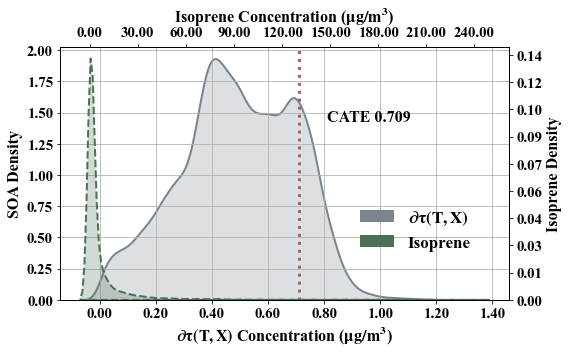

In [14]:
# 创建两个子图
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
fig.set_facecolor('white')
# 绘制第一个子图
sns.kdeplot(X1, ax=ax1, color='#7A848D', label='pm1_effects', linestyle='-', linewidth=2,fill=True)
ax1.set_xlabel('$\mathbf{\partialτ(T, X)}$ Concentration ($\mathbf{μg/m^3}$)',fontsize=16, fontweight='bold')
ax1.set_ylabel('SOA Density',fontsize=16, fontweight='bold')


# Create a twinned x-axis based on ax1
ax1b = ax1.twiny()

# Create a twinned y-axis based on ax1b (effectively ax2)
ax2 = ax1b.twinx()

# ax2=ax1.twiny().twinx()
# 绘制第二个子图
sns.kdeplot(X2, ax=ax2, color='#4A7056', label='c5h8', linestyle='--', linewidth=2,fill=True)
ax2.set_ylabel('Isoprene Density',fontsize=16, fontweight='bold')
ax1b.set_xlabel('Isoprene Concentration ($\mathbf{μg/m^3}$)',fontsize=16, fontweight='bold')

# Optional: vertical line
ax1.axvline(x=0.709, color='#976666', linestyle=':', linewidth=3, label='Threshold')
ax1.text(0.709 + 0.1, ax1.get_ylim()[1] * 0.75, 'CATE 0.709', color='black', verticalalignment='top',fontsize=16, fontweight='bold')

ax1.grid()

def format_ticks(x, pos):
    return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
# 设置x轴刻度的格式
ax1.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=10))
ax1.xaxis.set_major_formatter(FuncFormatter(format_ticks))
ax1.xaxis.set_major_locator(MaxNLocator(nbins=10))
ax2.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=10))
ax2.xaxis.set_major_formatter(FuncFormatter(format_ticks))
ax2.xaxis.set_major_locator(MaxNLocator(nbins=10))

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
ax1b.tick_params(axis='both', labelsize=12)

label=['$\mathbf{\partialτ(T, X)}$','Isoprene']
# 创建代表聚类颜色的图例
from matplotlib.patches import Patch
cluster_patches = [Patch(facecolor=color) for color in ['#7A848D','#4A7056']]
fig.legend(cluster_patches, label, frameon=False, loc="center right", fontsize=14, ncol=1, bbox_to_anchor=(0.85, 0.35), prop={'weight': 'bold','size':17})


for axe in [ax1, ax2, ax1b]:
    for label in axe.get_xticklabels() + axe.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(15)

plt.tight_layout()  # 自动调整子图布局，防止重叠
plt.savefig("全球负反馈审稿.jpg",dpi=500)
plt.show()

In [15]:
from statsmodels.nonparametric.smoothers_lowess import lowess

Tgroup = pd.DataFrame(X2)
effects = pd.DataFrame(X1)
# 计算T的均值和标准差
T_mean = Tgroup.mean().item()
T_std = Tgroup.std().item()
T_min = Tgroup.min().item()
# 确定T的取值范围，取均值正负两个标准差
t_min = 0
t_max = T_mean + 2 * T_std
# t_max = X2.max()
# 对 Xgroup、effects、lb 和 ub 进行排序
sorted_indices = Tgroup.values.argsort(axis=0).flatten()
sorted_x = Tgroup.iloc[sorted_indices].values.flatten()
sorted_effects = effects.values.flatten()

# 使用带权重的 LOWESS 进行平滑
smoothed = lowess(sorted_effects, sorted_x)
# 计算残差
residuals = sorted_effects - np.interp(sorted_x, smoothed[:, 0], smoothed[:, 1])

# 估计残差的标准差
residual_std = np.std(residuals)

# 构造置信区间
lower_bound = smoothed[:, 1] - 1.96 * residual_std
upper_bound = smoothed[:, 1] + 1.96 * residual_std

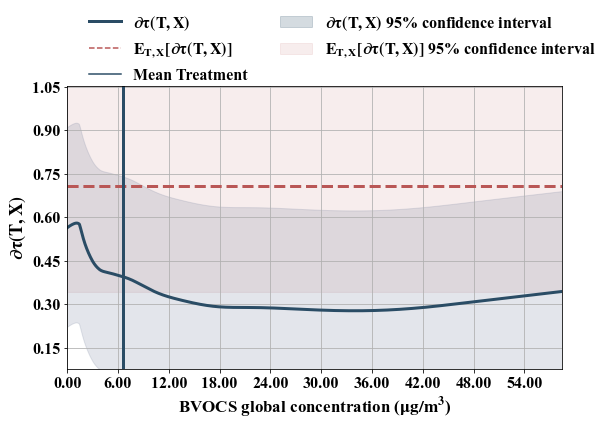

In [16]:
ate=0.70925199
lb=0.34044283
ub=1.07806116


t_max = T_mean + 3 * T_std

# 创建子图，每个T对应一个子图，X的值不在图上显示
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
fig.set_facecolor('white')

# 散点图
# ax.scatter(sorted_x, sorted_effects[:, i], c='#A1B0AD', marker='s', alpha=0.1)
ax.plot(smoothed[:, 0], smoothed[:, 1], color='#2A4C65', linewidth=3,label='$\mathbf{\partial τ(T, X)}$')  # 平滑的均值线

# ax.set_title(f'BVOCs的限制性效应值\nEffects of BVOCs on PM$_1$', fontsize=14)
ax.set_xlabel(r'BVOCS global concentration ($\mathbf{μg/m^3}$)', fontsize=17, fontweight='bold')
ax.set_ylabel('$\mathbf{\partial τ(T, X)}$',fontsize=18, fontweight='bold')
ax.set_xlim(t_min, t_max)  # 设置横坐标范围
ax.tick_params(axis='both', labelsize=11)
ax.grid(True)
# 设置y轴范围为y正负两个标准差
ax.set_ylim(smoothed[:, 1].min()-2*smoothed[:, 1].std(), smoothed[:, 1].max()+2*smoothed[:, 1].std())

ax2 = ax
ax2.set_xlim(t_min, t_max)  # 与原坐标轴范围一致
ax2.axhline(y=ate, color='#B95756', linestyle='--', label='$\mathbf{E_{T, X}[\partial τ(T, X)]}$',linewidth=3)
ax2.fill_between(sorted_x, lb, ub, color='#B95756', alpha=0.1)  # 置信区间

ax.tick_params(axis='both', labelsize=13)
ax.axvline(x=T_mean,label='Mean Treatment', color='#2A4C65',linewidth=3)

def format_ticks(x, pos):
    return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
# 设置x轴刻度的格式
ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.yaxis.set_major_locator(MaxNLocator(nbins=7))
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))


ax.fill_between(smoothed[:, 0], lower_bound, upper_bound, color='#75809C', alpha=0.2, label='95% Confidence Interval')

# 添加图例并设置位置在总图的顶端
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
# 用于保存图例的自定义图例对象
custom_legend = [
    Line2D([0], [0], color='#2A4C65', linewidth=3, label='$\mathbf{\partial τ(T, X)}$'),
    Line2D([0], [0], color='#B95756', linestyle='--', label='$\mathbf{E_{T, X}[\partial τ(T, X)]}$'),
    Line2D([0], [0], color='#2A4C65', label='Mean Treatment'),
    Patch(facecolor='#2A4C65', edgecolor='#2A4C65', alpha=0.2, label='$\mathbf{\partialτ(T, X)}$ 95% confidence interval'),
    Patch(facecolor='#B95756', edgecolor='#B95756', alpha=0.1, label='$\mathbf{E_{T, X}[\partial τ(T, X)]}$ 95% confidence interval')
]

# 在总图上添加图例，只显示一个图例
# fig.legend(handles=custom_legend,frameon=False, fontsize=18, loc="center right",ncol=1, bbox_to_anchor=(1.6, 0.6))
fig.legend(handles=custom_legend,frameon=False, fontsize=15, loc="upper center",ncol=2, bbox_to_anchor=(0.6, 1.2), prop={'weight': 'bold','size':16})

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(16)



plt.tight_layout()

plt.tight_layout()  # 自动调整子图布局，防止重叠
plt.savefig("全球负反馈2审稿.jpg",dpi=500, bbox_inches='tight')
plt.show()

In [17]:
estimator=joblib.load("estimator_train.pkl")

In [18]:
from sklearn.preprocessing import StandardScaler
import itertools
from scipy.interpolate import make_interp_spline

In [19]:
dataa = pd.read_excel("dataDMLnoscale.xlsx", index_col=0)

In [20]:
name = ['so2', 'no2', 'no', 'go3', 'c5h8', 'pm1', 'pm2p5', 'ssr', 'r', 't', 'nox']
name2 = ['so2', 'go3', 'c5h8', 'pm1', 'ssr', 'r', 't', 'nox']
columnname = [
    'SO2',
    'O3',
    '异戊二烯浓度',
    'PM1',
    '地面层净辐射',
    '地面层湿度',
    '地面层温度'
    , 'NOx'
]

Xname = ['nox',
         'go3',
         'so2',
         'ssr',
         't',
         'r', ]
Tname = ['c5h8',
         'b2',
         'b3',
         'b4']

Wname = ["Place",
         'Month',
           'KMeansLabel']
data = dataa[columnname].copy()
data.columns = name2

In [21]:
dataa.columns=[
   'Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene',
    'NOx',
    'O3',
    'PM1',
    'SO2',
    'Radiation',
    'Temperature',
    'Humidity',
    'TICCLabel',
    "Place",
    'Month',
    'KMeansLabel'
]

In [22]:
averaged_dataset = dataseto
from sklearn.model_selection import train_test_split
X_transdata=data[Xname]
y_transdata=dataa['PM1']
T_transdata=dataa[['Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene']]

Dummy=[pd.get_dummies(dataa[i], prefix=i,drop_first=True).astype(int) for i in Wname]
W_transdata=pd.concat([Dummy[0],Dummy[1],Dummy[2]], axis=1)
X_combined = pd.concat([pd.DataFrame(X_transdata), W_transdata], axis=1)
# X_combined.columns=['NOx', 'O3', 'SO2', 'Radiation', 'Temperature', 'Humidity', 'Place_jh',
#        'Month_Jul', 'Month_Jun', 'KMeansLabel_1', 'KMeansLabel_2',
#        'KMeansLabel_3']

X_combined.columns=['nox',
         'go3',
         'so2',
         'ssr',
         't',
         'r', 'Place_jh',
       'Month_Jul', 'Month_Jun', 'KMeansLabel_1', 'KMeansLabel_2',
       'KMeansLabel_3']

X_train_combined, X_test_combined, y_train, y_test, T_train, T_test = train_test_split(X_combined, y_transdata, T_transdata, test_size=0.2, random_state=42)
columns_to_scale = ['nox',
         'go3',
         'so2',
         'ssr',
         't',
         'r']
# Separate out the parts of X_combined that need to be standardized
X_to_scale = X_train_combined[columns_to_scale]
X_test_to_scale = X_test_combined[columns_to_scale]
# Initialize the scaler and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_combined[columns_to_scale])
X_scaled = scaler.transform(X_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)
# Convert scaled arrays back to DataFrame for concatenation
X_scaled_df = pd.DataFrame(X_scaled, columns=columns_to_scale, index=X_to_scale.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns_to_scale, index=X_test_to_scale.index)
# Replace the original columns in X_combined with the scaled ones
X_train_combined[columns_to_scale] = X_scaled_df
X_test_combined[columns_to_scale] = X_test_scaled_df
X_combined[columns_to_scale] = scaler.transform(X_combined[columns_to_scale])


In [23]:
# 从NetCDF文件中提取X因素并应用归一化
X_data = np.stack([averaged_dataset.variables[var_name][:].data.flatten() for var_name in Xname], axis=1)
# 找到 'ssr' 在 Xname 中的索引并赋予所有行13.396
ssr_index = Xname.index('ssr')  # 获取 'ssr' 变量的索引
X_data[:, ssr_index] = 13.396  # 将所有 'ssr' 值设为 13.396
original_X_data = X_data.copy()
X_data = scaler.transform(X_data)  # 注意调整Xname以匹配实际变量顺
X_data=pd.DataFrame(X_data,columns=Xname)
X_data["Place_jh"]=0
X_data["Month_Jul"]=0
X_data["Month_Jun"]=0
X_data["KMeansLabel_1"]=0
X_data["KMeansLabel_2"]=1
X_data["KMeansLabel_3"]=0

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
X_data.columns=['NOx', 'O3', 'SO2', 'Radiation', 'Temperature', 'Humidity', 'Place_jh',
       'Month_Jul', 'Month_Jun', 'KMeansLabel_1', 'KMeansLabel_2',
       'KMeansLabel_3']

In [25]:
Xname = ['NOx',
         'O3',
         'SO2',
         'Radiation',
         'Temperature',
         'Humidity', ]
Tname = ['Isoprene']
Xcolname=[   'NOx',
    f'O$_3$',
    f'SO$_2$',
    'Radiation',
    'Temperature',
    'Humidity',
            ]
grouped_data=X_data.copy()

In [26]:
grouped_data['Isoprene']=dataseto.variables["c5h8"][:].data.flatten()
grouped_data['LAI'] = np.mean(datasfc.variables["lai_hv"][:], axis=0).flatten()
# 筛选 LAI 在 2.389 到 4.281 范围内的数据
lai_filtered = (grouped_data['LAI'] >= 2.389) & (grouped_data['LAI'] <= 4.281)
# 使用布尔索引筛选 Isoprene 数据
grouped_data = grouped_data[lai_filtered]

In [27]:
N=100
# Redefine columnname from the data columns

# Set the numerical and categorical columns
numerical_cols = ['Place_jh',
       'Month_Jul', 'Month_Jun', 'KMeansLabel_1', 'KMeansLabel_2',
       'KMeansLabel_3']
categorical_cols = ['NOx', 'O3', 'SO2', 'Radiation', 'Temperature', 'Humidity',  'Isoprene', 'LAI']


# Process the numerical columns
grouped_numerical = grouped_data[numerical_cols].groupby(grouped_data.index // N).mean()

# Process the categorical columns by taking the mode (most frequent category)
grouped_categorical = grouped_data[categorical_cols].groupby(grouped_data.index // N).agg(lambda x: x.value_counts().index[0])
# Concatenate the results
grouped_data = pd.concat([grouped_numerical, grouped_categorical], axis=1)
grouped_data  # Display the first few rows for review

,Place_jh,Month_Jul,Month_Jun,KMeansLabel_1,KMeansLabel_2,KMeansLabel_3,NOx,O3,SO2,Radiation,Temperature,Humidity,Isoprene,LAI
408,0.0,0.0,0.0,0.0,1.0,0.0,-1.357139,0.853801,-2.064541,-0.000004,-5.403643,-1.217083,0.064516,2.510918
416,0.0,0.0,0.0,0.0,1.0,0.0,-1.357139,0.825021,-2.064541,-0.000004,-5.340528,-1.286466,0.064516,3.193233
417,0.0,0.0,0.0,0.0,1.0,0.0,-1.357139,0.819266,-2.064541,-0.000004,-5.232331,-1.295717,0.129032,3.193233
425,0.0,0.0,0.0,0.0,1.0,0.0,-1.357139,0.742519,-2.064541,-0.000004,-5.340528,-1.455297,0.290323,2.898170
426,0.0,0.0,0.0,0.0,1.0,0.0,-1.357139,0.819266,-2.064541,-0.000004,-5.151184,-1.226334,0.258065,3.988946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,0.0,0.0,0.0,0.0,1.0,0.0,-1.357139,1.151193,-2.064541,-0.000004,-8.938071,0.630806,0.000000,3.173668
3238,0.0,0.0,0.0,0.0,1.0,0.0,-1.357139,1.139681,-2.064541,-0.000004,-8.577415,0.279267,0.000000,3.780008
3247,0.0,0.0,0.0,0.0,1.0,0.0,-1.357139,1.208752,-2.064541,-0.000004,-8.676596,0.293144,0.000000,3.620684
3256,0.0,0.0,0.0,0.0,1.0,0.0,-1.357139,1.132006,-2.064541,-0.000004,-8.514301,0.864394,0.000000,3.390151


In [28]:
def plotinterraction(name1, name2, cmap):
    interest_vars = [name1, name2]
    feature_names = Xname
    all_points = []
    all_lowers = []
    all_uppers = []
    fnames = []
    # Loop over all combinations and compute effects and their intervals
    for k in range(len(interest_vars) + 1):
        for subset in itertools.combinations(interest_vars, k):
            x_test = np.zeros(len(feature_names), dtype=int)
            for var in subset:
                idx = feature_names.index(var)
                x_test[idx] = 1

            feature_combination = " : ".join(np.array(Xcolname)[x_test > 0])
            fnames.append(feature_combination)

            # Collecting effects for all treatments
            point_treatments = []
            lower_treatments = []
            upper_treatments = []
            for treatment_idx in range(len(Tname)):
                effect_values = estimator.const_marginal_effect([x_test])
                interval_values = estimator.const_marginal_effect_interval([x_test], alpha=0.05)
                point_treatments.append(effect_values[0][treatment_idx])
                lower_treatments.append(interval_values[0][0][treatment_idx])
                upper_treatments.append(interval_values[1][0][treatment_idx])

            # Averaging over all treatments
            all_points.append(np.mean(point_treatments))
            all_lowers.append(np.mean(lower_treatments))
            all_uppers.append(np.mean(upper_treatments))

    fnames[0] = 'Intercept'

    # Sorting based on the point values
    sort_idx = np.argsort(all_points)
    fnames = np.array(fnames)[sort_idx]
    all_points = np.array(all_points)[sort_idx]
    all_lowers = np.array(all_lowers)[sort_idx]
    all_uppers = np.array(all_uppers)[sort_idx]
    yerr = np.zeros((2, len(all_points)))
    yerr[0, :] = all_points - all_lowers
    yerr[1, :] = all_uppers - all_points
    Xgroup = pd.DataFrame(StandardScaler().fit_transform(grouped_data[Xname]), columns=Xname)
    Tgroup = grouped_data[Tname]
    # 选择两个特征的名称
    selected_features = interest_vars
    var1 = Xname.index(selected_features[0])
    var2 = Xname.index(selected_features[1])
    # 创建一个新的Xgroup，只包含两个特征，其他特征设定为0
    Xgroup_selected = Xgroup.copy()

    for feature in Xname:
        if feature not in selected_features:
            Xgroup_selected[feature] = 0

    # 计算这两个特征下的effects
    effects_selected = estimator.marginal_effect(X=Xgroup_selected, T=Tgroup)
    # 综合所有的T的结果
    average_effects = effects_selected.mean(axis=1)

    # Setting up the main figure and axes for the 2x1 subplots
    fig, axes = plt.subplots(1, 1, figsize=(6, 5))
    fig.set_facecolor('white')

    # First subplot
    ax = axes

    # Plotting the effects for the first subplot
    x = np.arange(len(all_points))
    stat_sig = (all_lowers > 0) | (all_uppers < 0)
    ax.errorbar(x[stat_sig], all_points[stat_sig], yerr[:, stat_sig], fmt='o', label='stat_sig',
                markersize=13, capsize=5, elinewidth=3, color="#75809C")
    ax.errorbar(x[~stat_sig], all_points[~stat_sig], yerr[:, ~stat_sig], fmt='s', color='#B95756', label='insig',
                markersize=13, capsize=5, elinewidth=3)

    # 平滑化：使用 Cubic Spline 插值
    x_smooth = np.linspace(min(x), max(x), 500)  # 平滑的 x 点
    spline = make_interp_spline(x, all_points, k=2)  # 三次样条插值
    y_smooth = spline(x_smooth)  # 平滑的 y 值

    # 添加平滑的折线
    ax.plot(x_smooth, y_smooth, color='#B95756', linestyle='-', linewidth=3, label='Smoothed Trend Line')

    for j, txt in enumerate(all_points):
        ax.text(x[j] + 0.5, all_points[j] + 0.01, str(round(txt, 3)), ha='center', fontsize=18, fontweight='bold',
                rotation=90)

    ax.set_xticks(x)
    ax.set_xticklabels(fnames, rotation=24, fontsize=16, fontweight='bold')
    ax.set_ylabel('$\mathbf{\partial τ(T, X)}$', fontsize=17, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    ax.set_title('Average $\mathbf{\partial τ(T, X)}$ of BVOCs', fontsize=18, fontweight='bold')
    ax.set_xlim(-0.6, len(x) - 0.3)
    ax.grid(True)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(16)


    # 图形边框
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(16)

    for tick in cbar.ax.yaxis.get_ticklabels():
        tick.set_fontweight('bold')

    def format_ticks(x, pos):
        return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改

    # 设置x轴刻度的格式
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=9))

    # Adjusting the layout
    fig.tight_layout()
    plt.savefig(f'{interest_vars[0]}和{interest_vars[1]}交互双图全球.svg', bbox_inches='tight')
    # Displaying the plots
    plt.show()


C:\Users\aa271\AppData\Local\Temp\ipykernel_3672\4187110159.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap(cmap_original.name + "_r")


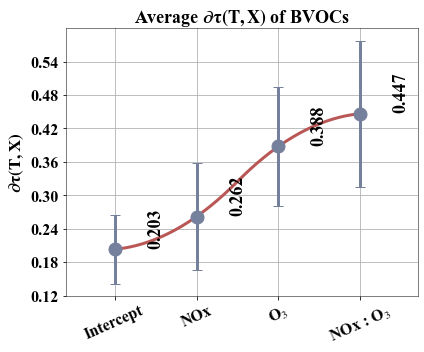

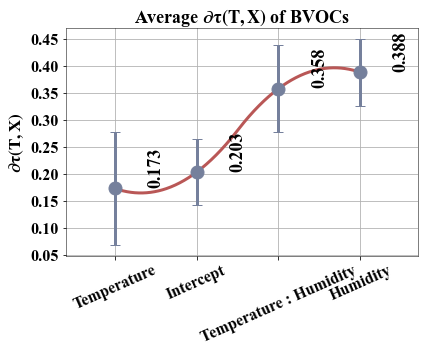

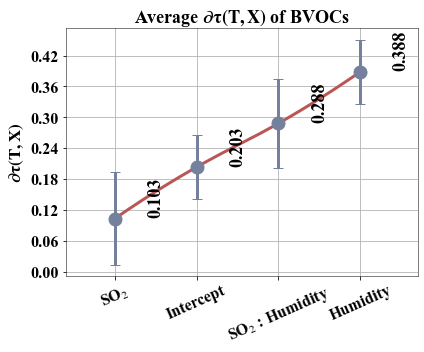

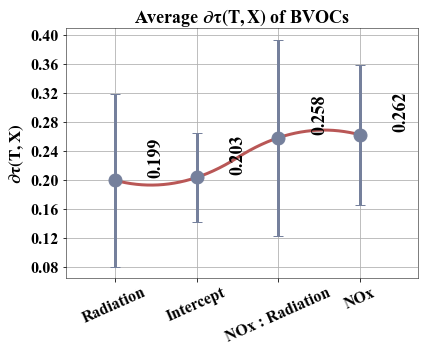

In [29]:
invar = [('O3', 'NOx'), ('Temperature', 'Humidity'), ('SO2', 'Humidity'), ('NOx', 'Radiation')]
cmap_original = sns.color_palette("Spectral", as_cmap=True)
cmap_reversed = plt.cm.get_cmap(cmap_original.name + "_r")
for i in invar:
    plotinterraction(i[0], i[1], cmap=cmap_reversed)